### Our aim is to build a predictive model for the churn rate in a bank
Let's get started!

In [2]:
# import important libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os

In [20]:
# import our dataset for that bank for our research
directory_src = r'~/Desktop/AI-ML Requirments/Professional Track_ITIDA_Scholarship/Project_DSC_churn_prediction'
directory_dist = 'datasets/churnd'
file = 'churn.csv'

path = os.path.join(directory_src, file)
path_dist = os.path.join(directory_dist, file)
def load_data(path=path):
    # if the directory of our dataset doesn't exist, please create it.
    if not os.path.isdir(directory_dist):
       os.makedirs(directory_dist) 
    df = pd.read_csv(path)
    df.to_csv(path_dist)
    return df

In [25]:
df = load_data() # loading and saving are done!

In [26]:
# data investigations for gaining insights
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
# let's investigate the data numerical attributes
df.describe() # ~20.37% of the customers in our data exited.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
df[df.Exited==1] # 20.37% = 2037 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


### let's do some visualizations including: histograms, scatterplots for gaining insights.

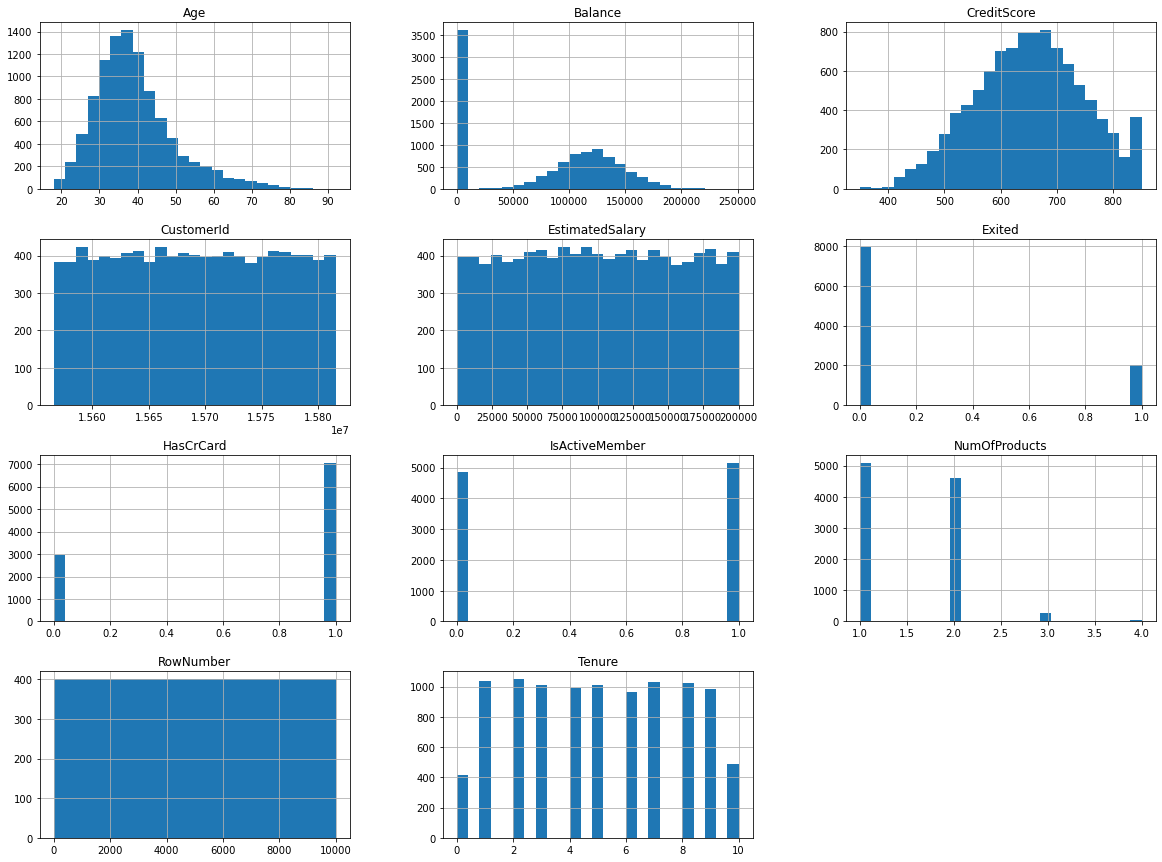

In [38]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

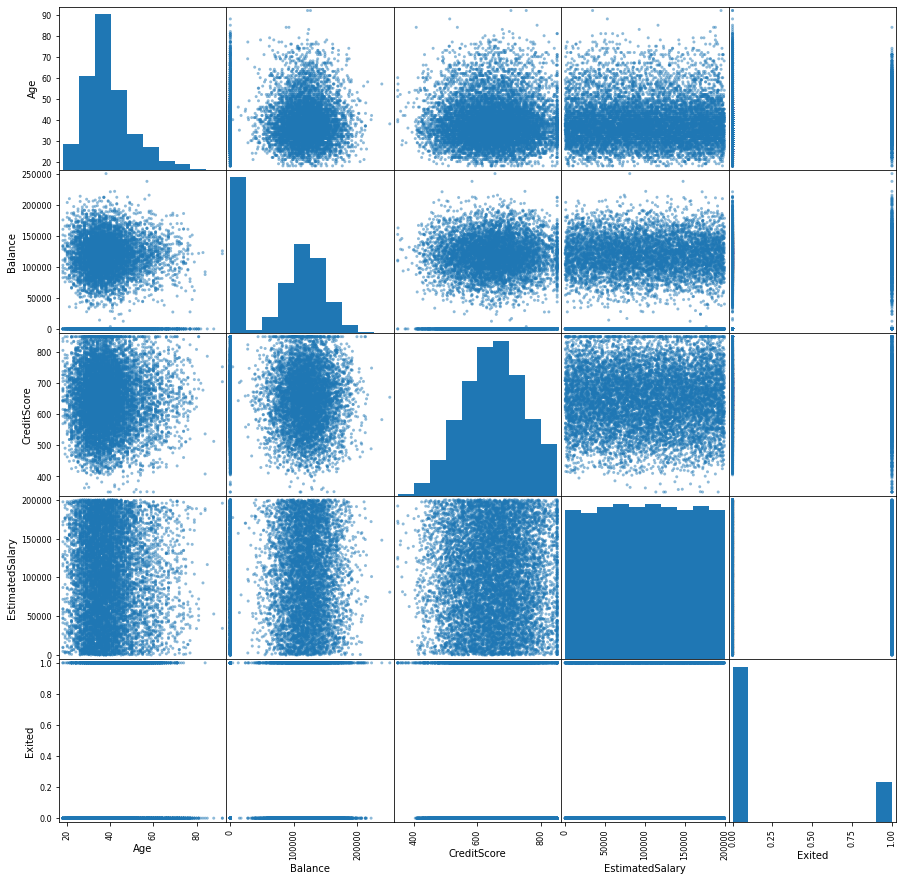

In [51]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['Age', 'Balance',  'CreditScore', 'EstimatedSalary', 'Exited']], figsize=(15, 15))
plt.show()

### In my opinion, we still not able to grasp the insights and correlations with `Exited` attribute so let's try another technique.

In [59]:
# let's split aour dataframe into numerical and categorical attributes for going in investigations in depth
df_num = df[list(df.describe())]
df_cat = df[['Surname', 'Geography', 'Gender']]

In [60]:
df_num.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df_cat.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [65]:
# let's take a copy of our numerical attributes dataframe for some playing with it/feature engineering processes for investigations.
df_num_ = df_num.copy()

Exited               1.000000
Age                  0.285323
AgeBucket            0.272935
CreditPerProducts    0.118944
Balance              0.118533
BalanceBucket        0.117442
BalancePerTenure     0.070780
BalPerTenBucket      0.048531
BalancePerSalary     0.025558
SalPerTenBucket      0.018287
SalaryPerTenure      0.017585
EstimatedSalary      0.012097
SalaryBucket         0.011848
CustomerId          -0.006248
HasCrCard           -0.007138
Tenure              -0.014001
RowNumber           -0.016571
CrScoreBucket       -0.026506
CreditScore         -0.027094
NumOfProducts       -0.047820
TenurePerAge        -0.123069
IsActiveMember      -0.156128
Name: Exited, dtype: float64

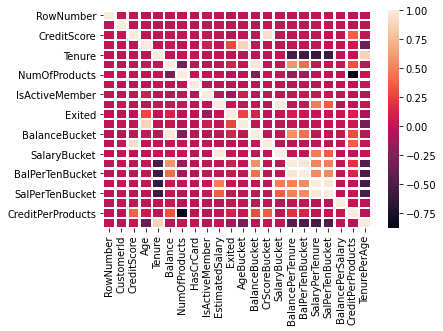

In [601]:
# let's visualize our linear correlation matrix for gaining insights
corr_mat = df_num_.corr()
sns.heatmap(corr_mat, linewidths=1.5)
corr_mat['Exited'].sort_values(ascending=False)

In [103]:
# we will focus on the Age, Balance attributes for gaining insights

### We replace the `Age` attribute with the `AgeBucket` instead to help our model detect the impact of each Age stratum on the churn rate

             Exited
AgeBucket          
0          0.061224
20         0.100034
40         0.370806
60         0.285714
80         0.066667


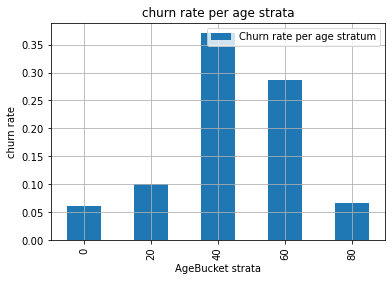

In [271]:
# we can see that the rate of churn for each startum of the age: has a very different impact on the churn rate.
df_num_['AgeBucket'] = df_num_.Age//20*(20)
print(df_num_[['AgeBucket', 'Exited']].groupby(['AgeBucket']).mean())
df_num_[['AgeBucket', 'Exited']].groupby(['AgeBucket']).mean().plot(kind='bar')
plt.grid()
plt.title('churn rate per age strata')
plt.ylabel('churn rate')
plt.xlabel('AgeBucket strata')
plt.legend(['Churn rate per age stratum'])
plt.show()

### We replace the `Balance` attribute with the `BalanceBucket` instead to help our model detect the impact of each Balance stratum on the churn rate¶

                 Exited
BalanceBucket          
0.0            0.142470
50000.0        0.198807
100000.0       0.257702
150000.0       0.219251
200000.0       0.545455
250000.0       1.000000


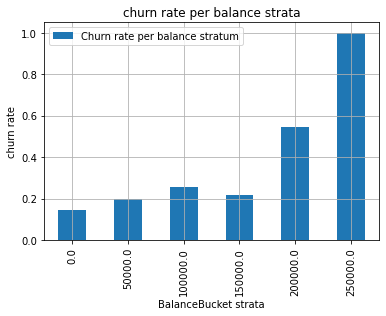

In [105]:
# we can see that the rate of churn for each startum of the balance: has a very different impact on the churn rate.
df_num_['BalanceBucket'] = df_num_.Balance//50000*(50000)
print(df_num_[['BalanceBucket', 'Exited']].groupby(['BalanceBucket']).mean())
df_num_[['BalanceBucket', 'Exited']].groupby(['BalanceBucket']).mean().plot(kind='bar')
plt.grid()
plt.title('churn rate per balance strata')
plt.ylabel('churn rate')
plt.xlabel('BalanceBucket strata')
plt.legend(['Churn rate per balance stratum'])
plt.show()

### We replace the `CreditScore` attribute with the `CrScoreBucket` instead to help our model detect the impact of each Credit Card stratum on the churn rate¶

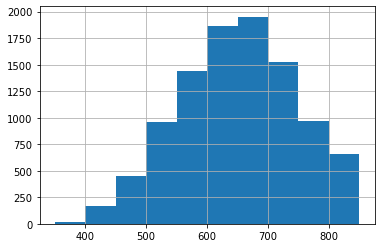

In [122]:
df_num_.CreditScore.hist()

                 Exited
CrScoreBucket          
250            1.000000
375            0.222581
500            0.211392
625            0.195428
750            0.197782


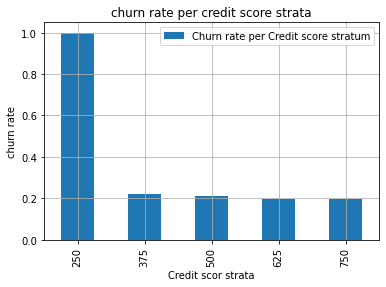

In [121]:
# we can see that the rate of churn for each startum of the credit score: has a very different impact on the churn rate.
df_num_['CrScoreBucket'] = df_num_.CreditScore//125*(125)
print(df_num_[['CrScoreBucket', 'Exited']].groupby(['CrScoreBucket']).mean())
df_num_[['CrScoreBucket', 'Exited']].groupby(['CrScoreBucket']).mean().plot(kind='bar')
plt.grid()
plt.title('churn rate per credit score strata')
plt.ylabel('churn rate')
plt.xlabel('Credit scor strata')
plt.legend(['Churn rate per Credit score stratum'])
plt.show()

### All customers in the bank with a credit card score `less than 406`: 23/2037 customers, Exited!

In [227]:
df[df.CreditScore<406]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,1202,15651052,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2115,2116,15718893,Pirozzi,404,Germany,Female,54,4,125456.07,1,1,0,83715.66,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1


In [156]:
df[df.CreditScore<405].Exited.value_counts().index.values, df[df.CreditScore<406].Exited.value_counts().index.values

(array([1], dtype=int64), array([1, 0], dtype=int64))

### We replace the `EstimatedSalary` attribute with the `SalaryBucket` instead to help our model detect the impact of each Salary stratum on the churn rate¶

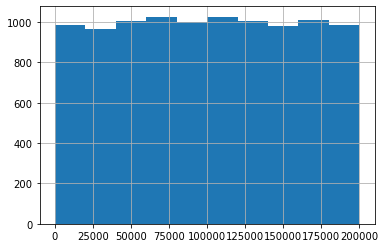

In [161]:
df.EstimatedSalary.hist()

                Exited
SalaryBucket          
0.0           0.206636
35000.0       0.196571
70000.0       0.191690
105000.0      0.202741
140000.0      0.212121
175000.0      0.216667


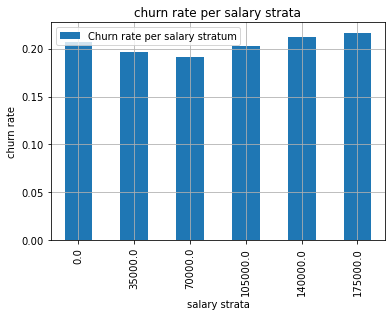

In [196]:
df_num_['SalaryBucket'] = df_num_.EstimatedSalary//35000*(35000)
print(df_num_[['SalaryBucket', 'Exited']].groupby(['SalaryBucket']).mean())
df_num_[['SalaryBucket', 'Exited']].groupby(['SalaryBucket']).mean().plot(kind='bar')
plt.grid()
plt.title('churn rate per salary strata')
plt.ylabel('churn rate')
plt.xlabel('salary strata')
plt.legend(['Churn rate per salary stratum'])
plt.show()

In [194]:
df[df.EstimatedSalary<250000]['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### With respect to the numerical continous attributes, we deduced that we should replace them with their corresponding categorical versions to help our model detect the pattern in our data very well

#### With respect to the numerical categorical attributes, they will be with no changes as they are well prepared with no missing values

### let's try combining some attributes to check their impact on the target attribute `Exited`

In [197]:
# Balance/Tenure
df_num_['BalancePerTenure'] = df_num_.Balance/df_num_.Tenure

In [600]:
df_num_['TenurePerAge'] = df_num_.Tenure/df_.Age

In [203]:
df_num_[['BalancePerTenure', 'Exited']].groupby(['BalancePerTenure']).mean()

,Exited
BalancePerTenure,
0.000000e+00,0.137931
1.782850e+03,0.000000
2.076532e+03,1.000000
2.611479e+03,1.000000
3.005431e+03,1.000000
...,...
1.981139e+05,0.000000
2.001178e+05,0.000000
2.094902e+05,1.000000


### Great Job! We could detect a strong variability in the `Exited` i.e. churn rate for each strata of the Balance Per Tenure attribute

                   Exited
BalPerTenBucket          
0.0              0.188228
25000.0          0.239947
50000.0          0.203774
75000.0          0.205761
100000.0         0.334764
125000.0         0.210256
150000.0         0.349206
175000.0         0.041667
200000.0         0.666667


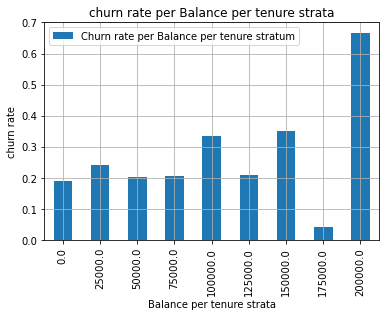

In [212]:
print(df_num_[['BalPerTenBucket', 'Exited']].groupby(['BalPerTenBucket']).mean())
df_num_[['BalPerTenBucket', 'Exited']].groupby(['BalPerTenBucket']).mean().plot(kind='bar')
plt.grid()
plt.title('churn rate per Balance per tenure strata')
plt.ylabel('churn rate')
plt.xlabel('Balance per tenure strata')
plt.legend(['Churn rate per Balance per tenure stratum'])
plt.show()

                   Exited
SalPerTenBucket          
0.0              0.198092
35450.0          0.209202
70900.0          0.226415
106350.0         0.273224
141800.0         0.179641
177250.0         0.222222


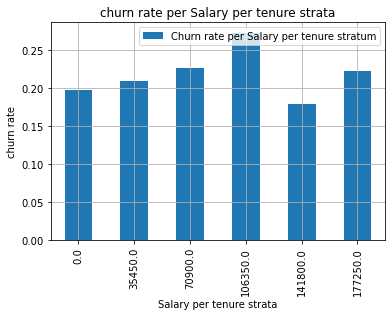

In [223]:
# EstimatedSalary/Tenure
df_num_['SalaryPerTenure'] = df_num_.EstimatedSalary/df_num_.Tenure
df_num_['SalPerTenBucket'] = df_num_.SalaryPerTenure//35450*(35450)
print(df_num_[['SalPerTenBucket', 'Exited']].groupby(['SalPerTenBucket']).mean())
df_num_[['SalPerTenBucket', 'Exited']].groupby(['SalPerTenBucket']).mean().plot(kind='bar')
plt.grid()
plt.title('churn rate per Salary per tenure strata')
plt.ylabel('churn rate')
plt.xlabel('Salary per tenure strata')
plt.legend(['Churn rate per Salary per tenure stratum'])
plt.show()

In [225]:
# let's try the balance/salary attribute
df_num_['BalancePerSalary'] = df_num_.Balance/df_num_.EstimatedSalary

In [237]:
df_num_.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,AgeBucket,BalanceBucket,CrScoreBucket,SalaryBucket,BalancePerTenure,BalPerTenBucket,SalaryPerTenure,SalPerTenBucket,BalancePerSalary,CreditPerProducts
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,30,0.0,500,70000.0,0.00,0.0,50674.44000,35450.0,0.000000,619.000000
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,30,50000.0,500,105000.0,83807.86,75000.0,112542.58000,106350.0,0.744677,608.000000
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,30,150000.0,500,105000.0,19957.60,0.0,14241.44625,0.0,1.401375,167.333333
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,30,0.0,625,70000.0,0.00,0.0,93826.63000,70900.0,0.000000,349.500000
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,30,100000.0,750,70000.0,62755.41,50000.0,39542.05000,35450.0,1.587055,850.000000


### let's try the combination of the credit/numOfproduts attribute

In [235]:
df_num_['CreditPerProducts'] = df_num_.CreditScore/df_num_.NumOfProducts

In [238]:
list(df_num)

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [239]:
list(df_cat)

['Surname', 'Geography', 'Gender']

In [240]:
df_cat.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [241]:
df_cat.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [249]:
df[df.Exited==1]['Surname'].value_counts()[:10]

Martin      9
Lin         9
Smith       9
McGregor    9
Cocci       7
Manna       7
Shih        7
Ma          7
Lo          7
Wang        7
Name: Surname, dtype: int64

### As long as that the `Age` attribute has the highest impact on the `Exited` (target) attribute; I am going to split the dataset into train and test based on this attribute so that all stratas of this attrbute to be represented in the test set as the train set for a better evaluation of the model

In [253]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_idx, test_idx in splitter.split(df, df_num_.AgeBucket):
    train_df = df.loc[train_idx]
    test_df = df.loc[test_idx]
train_df.shape, test_df.shape   

((9000, 14), (1000, 14))

I need to evaluate that our test dataset is including the same distribution of the values within the `AgeBucket` attribute as the same as the training dataset so as not to have a `sampling bias`in the model during evaluation

I am going to visualize the histogram for both the AgeBucket in both the train, test datasets

In [295]:
# create the AgeBucket attribute in both the train, test datasets
train_df['AgeBucket'] = train_df.Age//15*(15)
test_df['AgeBucket'] = test_df.Age//15*(15)

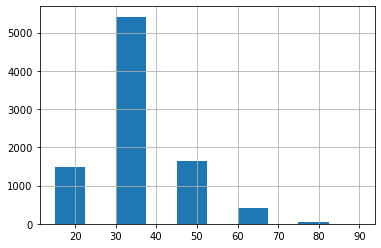

In [297]:
train_df.AgeBucket.hist()

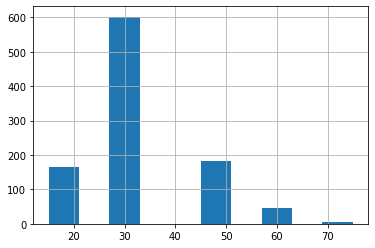

In [300]:
test_df.AgeBucket.hist() # identical histograms

### It's the time to build our transformers to preprocess our training dataset for the machine learning algorithm as we mentioned in the above cell

In [309]:
df_ = train_df.copy()

### The basic steps for preprocessing implemented using a pipeline for automation:
**the following is with respect to numerical (continous and discrete) attributes.**
1. replace `Age` with `AgeBucket`
2. replace `Balance` with `BalanceBucket`
3. replace `CreditScore` with `CrScoreBucket`
4. create `TenurePerAge` attribute
5. create `BalancePerSalary` attribute
6. create `CreditPerProducts` attribute
7. drop `RowNumber`, `CustomerId`  attributes

**the following is with respect to categorical attributes.**
1. create `ExitedNameRatio` attribute instead of the `Surname` attribute
2. encode `Gender`, `Geography` using the OneHotEncoder

In [599]:
df_.Tenure/df_.Age

7747    0.250000
7085    0.157895
8513    0.148148
9622    0.258065
1530    0.076923
          ...   
5026    0.227273
6388    0.068182
9170    0.066667
7517    0.120690
9280    0.133333
Length: 9000, dtype: float64

In [314]:
from sklearn.base import BaseEstimator, TransformerMixin

In [773]:
idx_crscore, idx_age, idx_tenure, idx_balance, idx_products, idx_estsalary = 0, 1, 2, 3, 4, 7

class create_buckets(BaseEstimator, TransformerMixin):
      def fit(self, X, y=None):
          return self
      def transform(self, X, y=None):
          # convert the dataframe into 2d numpy array  
          data_array = X.values 
            
          # we aim to replace the Age attribute with it's bucket array  
          ageBucket = data_array[:, idx_age]//15*(15)
          balanceBucket = data_array[:, idx_balance]//50000*(50000)
          crscoreBucket = data_array[:, idx_crscore]//125*(125)
          tenureperage =  data_array[:, idx_tenure]/data_array[:, idx_age]
          balpersal = data_array[:, idx_balance]/data_array[:, idx_estsalary]  
          creditperproduct = data_array[:, idx_crscore]/data_array[:, idx_products]
            
          # replace now and add the new created attributes 
          data_array[:, idx_age] = ageBucket
          data_array[:, idx_balance] = balanceBucket
          data_array[:, idx_crscore] = crscoreBucket
          return np.c_[data_array[:, :-1], tenureperage, balpersal, creditperproduct]

In [603]:
obj = create_buckets()
z = obj.fit_transform(df_)

In [607]:
z[10:20]

array([['Evans', 500, 'Spain', 'Female', 45, 5, 50000.0, 2, 1, 0,
        158590.66, 1, 0.09259259259259259, 0.5821043307342311, 283.5],
       ['Niu', 500, 'France', 'Male', 45, 9, 0.0, 1, 1, 1, 106340.66, 1,
        0.17307692307692307, 0.0, 595.0],
       ['Golubev', 625, 'France', 'Female', 15, 0, 100000.0, 1, 1, 0,
        17744.72, 0, 0.0, 7.889369908344566, 734.0],
       ['Kozlova', 625, 'Spain', 'Female', 30, 5, 0.0, 1, 1, 0, 17696.22,
        0, 0.1388888888888889, 0.0, 687.0],
       ['Tao', 625, 'Spain', 'Male', 30, 5, 0.0, 2, 1, 1, 147758.51, 0,
        0.1388888888888889, 0.0, 341.0],
       ['Azikiwe', 625, 'France', 'Female', 30, 4, 0.0, 1, 1, 1, 67879.8,
        0, 0.12121212121212122, 0.0, 725.0],
       ['Niu', 625, 'Spain', 'Male', 15, 4, 0.0, 2, 1, 0, 99341.87, 0,
        0.14814814814814814, 0.0, 329.5],
       ['Onyemere', 625, 'France', 'Female', 30, 1, 0.0, 2, 1, 0,
        4802.25, 0, 0.03225806451612903, 0.0, 343.0],
       ['Chiebuka', 500, 'Germany', 'Femal

In [606]:
z.shape #Done!

(9000, 15)

In [418]:
'Akubundu' in df['Surname'].values

True

In [499]:
df_.Surname

7747      Akubundu
7085    Napolitano
8513         Boyle
9622      Phillips
1530         Bligh
           ...    
5026           Hou
6388       Manfrin
9170          T'ao
7517      McGregor
9280      Townsend
Name: Surname, Length: 9000, dtype: object

In [774]:
idx_surname = 0

def get_ratio(series_surname, series_exited, series_not_exited):
    ratio_exited = []
    # for each name in the surnames of our whole data
    for name_ in series_surname.values:
        val_exited = 0
        val_not_exited = 0
        total = 0
        if name_ in series_exited.index:
           val_exited = series_exited[name_]
        if name_ in series_not_exited.index:
           val_not_exited = series_not_exited[name_]
        total = val_exited + val_not_exited
        ratio_exited.append(val_exited/total)  
    return ratio_exited

class count_exited(BaseEstimator, TransformerMixin):
      def fit(self, X, y=None):
          # we aim to get the count of names in both cases when that name exited and didn't exit to get the ratio of exited with respect to didn't exit for that name 
          series_exited = X[X['Exited']==1]['Surname'].value_counts()
          series_not_exited = X[X['Exited']==0]['Surname'].value_counts()
          # we aim to get the list of counts for each exited name by get_freq(self.series_) function
          self.ratio_exited = get_ratio(X.Surname, series_exited, series_not_exited)  
          return self
      def transform(self, X, y=None):
          data_ = X.values
          ratios_ = np.array(self.ratio_exited)
          # we replace the surname attribute with the ratio of exited for that surname and then to drop the target attribute
          data_[:, 0] = ratios_
        
          return data_

In [610]:
list(df_)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [611]:
obj = count_exited()
z = obj.fit_transform(df_)

In [612]:
z.shape

(9000, 12)

In [549]:
df_.Surname.value_counts()['Andrews']

6

In [550]:
temp = df_[df.Exited==1]

<ipython-input-550-09ab447063dc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df_[df.Exited==1]


In [551]:
temp.Surname.value_counts()['Fanucci']

6

In [552]:
temp2 = df_[df_.Exited==0]

In [553]:
temp2.Surname.value_counts()['Fanucci']

17

In [560]:
z[21:30]

array([[0.2, 641, 'France', 'Male', 31, 9, 112494.99, 1, 1, 1, 32231.6,
        0],
       [0.0, 538, 'Germany', 'Female', 42, 4, 80380.24, 1, 1, 0,
        119216.46, 0],
       [0.0, 617, 'France', 'Female', 34, 0, 131244.65, 2, 1, 0,
        183229.02, 0],
       [0.0, 632, 'France', 'Female', 36, 7, 0.0, 2, 1, 1, 52526.65, 0],
       [0.0, 690, 'France', 'Female', 26, 5, 157624.84, 1, 1, 1,
        49599.27, 0],
       [0.25, 652, 'Germany', 'Male', 27, 2, 166527.88, 2, 0, 1,
        146007.7, 0],
       [0.36363636363636365, 688, 'France', 'Female', 51, 5, 0.0, 1, 1,
        0, 91624.11, 1],
       [0.36363636363636365, 560, 'Spain', 'Female', 26, 3, 116576.45, 1,
        1, 0, 157567.37, 0],
       [0.14285714285714285, 604, 'Spain', 'Female', 41, 10, 0.0, 2, 1,
        1, 166224.39, 0]], dtype=object)

In [530]:
df_[df_.Exited==0]['Surname'].value_counts()[20:]

Jamieson     15
Ma           15
Wright       15
Shih         15
Johnson      15
             ..
Jacka         1
Malloy        1
Schatz        1
Flannagan     1
Alderete      1
Name: Surname, Length: 2454, dtype: int64

In [331]:
x = np.array([90, 80, 56, 78, 90, 80, 56, 78, 90, 80, 56, 78]).reshape(3, 4)

In [333]:
x

array([[90, 80, 56, 78],
       [90, 80, 56, 78],
       [90, 80, 56, 78]])

In [334]:
x[:, 2:]

array([[56, 78],
       [56, 78],
       [56, 78]])

### Combine the output of the numerical and categorical attributes
Using the column transformer library.

idx_crscore, idx_age, idx_tenure, idx_balance, idx_products, idx_estsalary = 0, 1, 2, 3, 4, 7
idx_surname = 0

In [775]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

attr_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
full_pipe = ColumnTransformer([
    ('count_excited', count_exited(), ['Surname', 'Exited']),
    ('num_pipe', create_buckets(), attr_list),
    ('scaler', StandardScaler(), ['EstimatedSalary']),
    ('encode_geo_gender', OneHotEncoder(), ['Geography', 'Gender'])
])

In [776]:
df_ = train_df.copy()

In [777]:
# extracting the training labels
y_train = df_.Exited.copy()

In [778]:
final_data = full_pipe.fit_transform(df_)

### Great Job ! We could transform our training dataframe `sucessfully` ;).

In [779]:
final_data.shape

(9000, 18)

In [1121]:
final_data[8000:8020] #1, 7

array([[0.25, 0, 375.0, 30.0, 7.0, 150000.0, 1.0, 1.0, 0.0,
        0.21212121212121213, 1.3736095583169592, 452.0,
        0.20278844915637442, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.4, 0, 750.0, 60.0, 1.0, 50000.0, 1.0, 1.0, 1.0,
        0.01639344262295082, 0.4591006177400714, 763.0,
        0.762088729125259, 0.0, 1.0, 0.0, 1.0, 0.0],
       [0.1111111111111111, 0, 375.0, 15.0, 8.0, 200000.0, 1.0, 1.0, 0.0,
        0.4, 1.5921539983467479, 463.0, 0.4884236328554109, 0.0, 0.0,
        1.0, 0.0, 1.0],
       [0.18181818181818182, 0, 625.0, 30.0, 8.0, 0.0, 2.0, 0.0, 0.0,
        0.25806451612903225, 0.0, 348.0, 1.5822863372162368, 1.0, 0.0,
        0.0, 1.0, 0.0],
       [0.0, 0, 625.0, 30.0, 4.0, 100000.0, 2.0, 1.0, 0.0,
        0.11428571428571428, 1.1699130605607067, 352.5,
        0.2864541840700336, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.2857142857142857, 0, 500.0, 30.0, 10.0, 100000.0, 2.0, 1.0,
        1.0, 0.24390243902439024, 0.6109927581816085, 277.5,
        1.4832386010575103, 0

In [783]:
df_.iloc[8999]

RowNumber              9281
CustomerId         15614847
Surname            Townsend
CreditScore             674
Geography            France
Gender               Female
Age                      45
Tenure                    6
Balance             72494.7
NumOfProducts             1
HasCrCard                 0
IsActiveMember            1
EstimatedSalary      140042
Exited                    0
Name: 9280, dtype: object

### Great Transformation Job is done here... !

#### We aim to create our transformed dataframe on the training dataset and to save it for furture researches

In [784]:
list_transformed_attrs = ['SurnamePercent', 'Exited', 'CreditCardBucket', 'AgeBucket', 'Tenure', 'BalanceBucket', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'TenurePerAge', 'BalancePerSalary', 'CreditPerProduct', 'EstSalaryScaled', 'Geo.France', 'Geo.Germany', 'Geo.Spain', 'Gen.Female', 'Gen.Male']

len(list_transformed_attrs)

18

In [785]:
train_df_transformed = pd.DataFrame(final_data, columns=list_transformed_attrs)

In [786]:
# let's see it's structure!
train_df_transformed.head()

,SurnamePercent,Exited,CreditCardBucket,AgeBucket,Tenure,BalanceBucket,NumOfProducts,HasCrCard,IsActiveMember,TenurePerAge,BalancePerSalary,CreditPerProduct,EstSalaryScaled,Geo.France,Geo.Germany,Geo.Spain,Gen.Female,Gen.Male
0,0,0,750,15,6,0,2,1,1,0.25,0,425,-1.51638,1,0,0,1,0
1,0.125,0,625,30,6,0,2,1,1,0.157895,0,362.5,1.01839,1,0,0,0,1
2,0.142857,0,625,15,4,100000,1,0,1,0.148148,5.06525,674,-1.36196,0,1,0,1,0
3,0,0,500,30,8,100000,1,1,0,0.258065,4.27287,590,-1.28819,1,0,0,0,1
4,0,0,500,15,2,100000,2,1,1,0.0769231,0.889962,305.5,0.358378,1,0,0,1,0


In [787]:
train_df_transformed.tail()

,SurnamePercent,Exited,CreditCardBucket,AgeBucket,Tenure,BalanceBucket,NumOfProducts,HasCrCard,IsActiveMember,TenurePerAge,BalancePerSalary,CreditPerProduct,EstSalaryScaled,Geo.France,Geo.Germany,Geo.Spain,Gen.Female,Gen.Male
8995,0,0,625,30,10,0,2,0,0,0.227273,0,313,1.11576,1,0,0,0,1
8996,0.294118,1,750,30,3,100000,1,1,0,0.0681818,8.89491,753,-1.47522,0,1,0,0,1
8997,0.153846,0,625,30,2,0,3,0,1,0.0666667,0,231.333,-1.48364,1,0,0,0,1
8998,0.421053,1,500,45,7,150000,1,1,0,0.12069,0.932337,586,1.09263,1,0,0,0,1
8999,0.2,0,625,45,6,50000,1,0,1,0.133333,0.517665,674,0.693476,1,0,0,1,0


**Great!**

In [789]:
# save this dataframe
train_df_transformed.to_csv('datasets/churnd/churn_train_transformed.csv', index=False)

### Let's start to train our model
I am going to try/fine-tune the following models for our Churn Rate Problem: `Binary Classification 1: Churned, 0: Didn't Churn`
1. `Stochastic Gradient Descent Classifier`
2. `Support Vector Machine Classifier`
3. `Desicion Tree Classifier`
4. `Random Forest Classifier`

Let's Get Started!

In [790]:
# We aim here to remove the target labels away from our final training 2d-numpy array for training.
X_train = np.c_[final_data[:, 0], final_data[:, 2:]]

In [799]:
X_train.shape, final_data.shape

((9000, 17), (9000, 18))

In [800]:
from sklearn.linear_model import SGDClassifier

model_SGD = SGDClassifier()

In [801]:
model_SGD.fit(X_train, y_train)

SGDClassifier()

In [802]:
# evaluate model prediction on the training data
SGD_train_pred = model_SGD.predict(X_train)

In [805]:
y_train[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [807]:
SGD_train_pred[:10]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

**It looks that the stochastic gradient descent classifier is `underfitting` the training dataset with overall accuracy = 63.62%**
We will need to use a more powerful model for a better prediction.

In [808]:
# let's evaluate the overall model accuracy on the training dataset
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, SGD_train_pred)
train_accuracy*100

63.62222222222223

In [817]:
# let's evaluate the model accuracy on multiple training rounds
from sklearn.model_selection import cross_val_score

cross_SGD_accuracy = cross_val_score(model_SGD, X_train, y_train, cv=10, scoring='accuracy')
(cross_SGD_accuracy.mean())*100

72.63333333333334

In [820]:
# let's investigate the model confusion matrix on training dataset
from sklearn.metrics import confusion_matrix
conf_SGD = confusion_matrix(y_train, SGD_train_pred)
conf_SGD

array([[4577, 2594],
       [ 680, 1149]], dtype=int64)

In [852]:
from sklearn.model_selection import cross_val_predict

cross_SGD_pred = cross_val_predict(model_SGD, X_train, y_train, cv=3)

In [853]:
# let's investigate the model confusion matrix on multiple rounds of training
from sklearn.metrics import confusion_matrix
conf_SGD = confusion_matrix(y_train, cross_SGD_pred)
conf_SGD

array([[3955, 3216],
       [ 749, 1080]], dtype=int64)

In [854]:
# let's see the model precision/recall/f1 metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train, cross_SGD_pred), recall_score(y_train, cross_SGD_pred), f1_score(y_train, cross_SGD_pred)

(0.25139664804469275, 0.590486604702023, 0.3526530612244898)

In [841]:
# optimal classifier is:
conf_SGD_ = confusion_matrix(y_train, y_train)
conf_SGD_

array([[7171,    0],
       [   0, 1829]], dtype=int64)

In [856]:
# let's investigate the SGradientDescent classifier Precision/Recall plot, ROC curve
from sklearn.metrics import precision_recall_curve

cross_SGD_score = cross_val_predict(model_SGD, X_train, y_train, cv=3, method='decision_function')
prec_sgd, recall_sgd, thre_sgd = precision_recall_curve(y_train, cross_SGD_score)

In [869]:
def precision_recall_curve_plot(precisions, recalls, thresholds):
    # plot() is used for continous values
    plt.plot(thresholds, precisions[:-1], 'r--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'b-', label='recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.grid()
    plt.title('Precision - Recall Curve vs Threshold')
    plt.figure(figsize=(25, 10))
    plt.show()

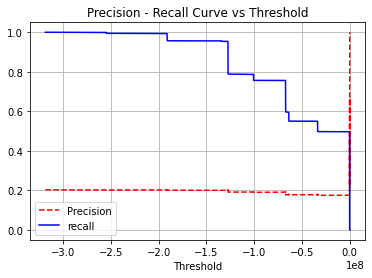

<Figure size 1800x720 with 0 Axes>

In [871]:
precision_recall_curve_plot(prec_sgd, recall_sgd, thre_sgd)

In [872]:
def precision_recall_direct_plot(recalls, precisions):
    plt.plot(recalls[:-1], precisions[:-1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.legend(['Recall-Precision'])
    plt.title('Precisin - Recall Curve Directly')
    plt.show()

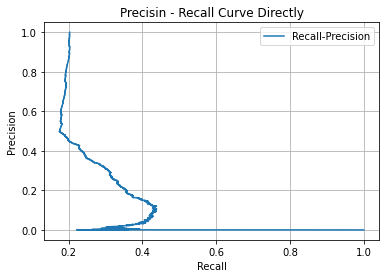

In [873]:
precision_recall_direct_plot(prec_sgd, recall_sgd)

In [874]:
# let's investigate the model roc curve
from sklearn.metrics import roc_curve
fpr_sgd, tpr_sgd, thre_sgd_roc = roc_curve(y_train, cross_SGD_score)

In [875]:
def roc_curve_plot(FPR, TPR):
    plt.plot(FPR, TPR, 'r-', label='FPR : TPR')
    plt.plot([0, 1], [0, 1], 'b--', label='diagonal') # plotting the diagonal of the ROC curve.
#     plt.plot([0, 0.4], [0.4, 0.98], 'b--', label='checked:)') # plotting the diagonal of the ROC curve.
    plt.legend()
    plt.grid()
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC curve of TPRate, FPRate')
    plt.show()

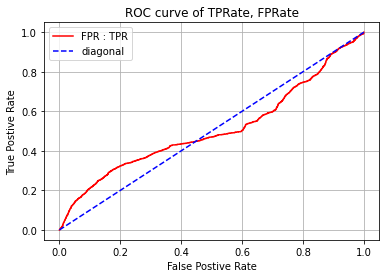

In [876]:
roc_curve_plot(fpr_sgd, tpr_sgd)

the stochastic gradient descent classifier is very poor on the training dataset and is considered as a very weak model

In [877]:
# area under the roc curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, cross_SGD_score)

0.5083264338724125

In [879]:
# let's try to train our support vector machine model
from sklearn.svm import SVC

model_SVC = SVC()

In [880]:
model_SVC.fit(X_train, y_train)

SVC()

Evaluate the SVC model on the training dataset

In [887]:
SVC_train_pred = model_SVC.predict(X_train)
SGD_train_pred[:10]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [888]:
y_train[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [890]:
# evaluate the model accuracy on training dataset
accuracy_score(y_train, SVC_train_pred)*100

79.74444444444444

In [892]:
# evaluate the confusion matrx on trainig dataset
confusion_matrix(y_train, SVC_train_pred)

array([[7159,   12],
       [1811,   18]], dtype=int64)

### Much better results

In [891]:
# evaluate on multiple rounds of trainig
cross_SVC_score = cross_val_score(SVC(), X_train, y_train, cv=10, scoring='accuracy')
(cross_SVC_score.mean())*100

79.67777777777778

In [894]:
# evaluate the accuracy on multiple trainig rounds
cross_SVC_pred = cross_val_predict(SVC(), X_train, y_train, cv=10)
accuracy_score(y_train, cross_SVC_pred)*100

79.67777777777778

In [895]:
confusion_matrix(y_train, cross_SVC_pred)

array([[7159,   12],
       [1817,   12]], dtype=int64)

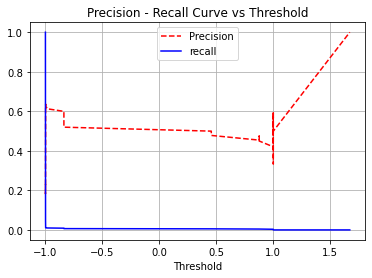

<Figure size 1800x720 with 0 Axes>

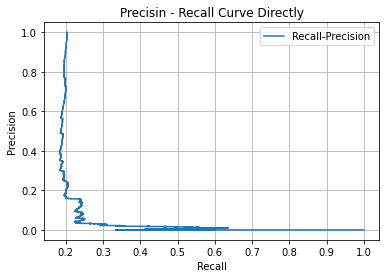

In [896]:
cross_SVC_score = cross_val_predict(SVC(), X_train, y_train, cv=10, method='decision_function')
prec_svc, recall_svc, thre_svc = precision_recall_curve(y_train, cross_SVC_score)
precision_recall_curve_plot(prec_svc, recall_svc, thre_svc)
precision_recall_direct_plot(prec_svc, recall_svc)

**We got an overall poor performance as well with the support vector machine classifier**

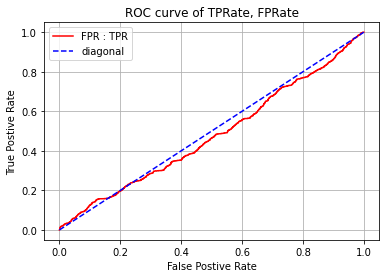

0.47849140869392304

In [898]:
# evaluate the roc curve
fpr_svc, tpr_svc, thre_svc_roc = roc_curve(y_train, cross_SVC_score)
roc_curve_plot(fpr_svc, tpr_svc)
roc_auc_score(y_train, cross_SVC_score)

In [899]:
# let's evaluate the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier()

In [900]:
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [901]:
DTC_train_pred = model_DTC.predict(X_train)

In [902]:
y_train.values[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [903]:
DTC_train_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

### For sure, our decision tree classifier reached accuracy = 100% on training dataset indicating **Overfitting** problem

In [904]:
accuracy_score(y_train, DTC_train_pred)*100

100.0

In [905]:
cross_DTC_train = cross_val_score(model_DTC, X_train, y_train, cv=10, scoring='accuracy')
(cross_DTC_train.mean())*100

85.04444444444444

In [1035]:
cross_DTC_pred = cross_val_predict(model_DTC, X_train, y_train, cv=10)
cross_DTC_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [1036]:
# evaluate the confusion matrix of multiple training rounds
confusion_matrix(y_train, cross_DTC_pred)

array([[6464,  707],
       [ 676, 1153]], dtype=int64)

In [1037]:
precision_score(y_train, cross_DTC_pred), recall_score(y_train, cross_DTC_pred), f1_score(y_train, cross_DTC_pred)

(0.6198924731182796, 0.63039912520503, 0.6251016535646516)

In [1038]:
model_DTC_ = DecisionTreeClassifier(max_depth=7)
cross_DTC_pred = cross_val_predict(model_DTC_, X_train, y_train, cv=10, method='predict_proba')
cross_DTC_pred[:10]

array([[1.        , 0.        ],
       [0.95017182, 0.04982818],
       [0.69230769, 0.30769231],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.78431373, 0.21568627],
       [1.        , 0.        ]])

In [1039]:
cross_DTC_score = cross_DTC_pred[:, 1] # labels of the +ve class only.`
prec_dtc, recall_dtc, thre_dtc = precision_recall_curve(y_train, cross_DTC_score)

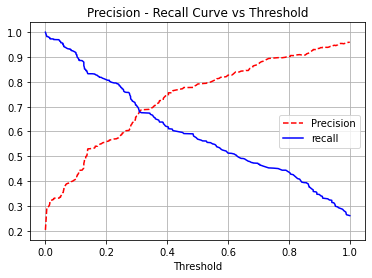

<Figure size 1800x720 with 0 Axes>

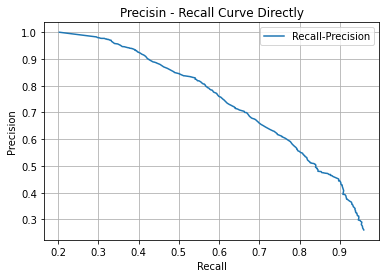

In [1040]:
precision_recall_curve_plot(prec_dtc, recall_dtc, thre_dtc)
precision_recall_direct_plot(prec_dtc, recall_dtc)

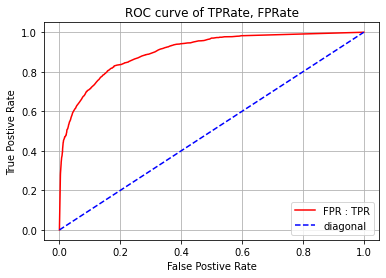

0.904021223628766

In [1041]:
fpr_dtc, tpr_dtc, thre_dtc_roc = roc_curve(y_train, cross_DTC_score)
roc_curve_plot(fpr_dtc, tpr_dtc)
roc_auc_score(y_train, cross_DTC_score)

In [1042]:
# let's try the random forest classifier
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier()

In [1043]:
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [1044]:
RFC_train_pred = model_RFC.predict(X_train)
RFC_train_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [1045]:
y_train.values[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [1046]:
# accuracy on multiple training processes
cross_RFC_train_score = cross_val_score(model_RFC, X_train, y_train, cv=10, scoring='accuracy')
(cross_RFC_train_score.mean())*100

89.89999999999998

In [1075]:
# confusion matrix for Random forest classifier
cross_RFC_pred = cross_val_predict(model_RFC, X_train, y_train, cv=5)
confusion_matrix(y_train, cross_RFC_pred)

array([[6930,  241],
       [ 690, 1139]], dtype=int64)

In [1082]:
cross_RFC_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [1076]:
precision_score(y_train, cross_RFC_pred), recall_score(y_train, cross_RFC_pred), f1_score(y_train, cross_RFC_pred)

(0.8253623188405798, 0.622744669218152, 0.709878466812091)

In [1077]:
cross_RFC_score = cross_val_predict(model_RFC, X_train, y_train, cv=10, method='predict_proba')
cross_RFC_score # we got the probability for each customer to be within which class either: churned or didn't churn

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.78, 0.22],
       ...,
       [0.7 , 0.3 ],
       [0.31, 0.69],
       [0.68, 0.32]])

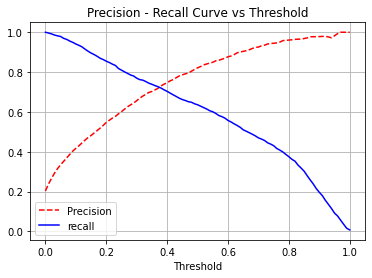

<Figure size 1800x720 with 0 Axes>

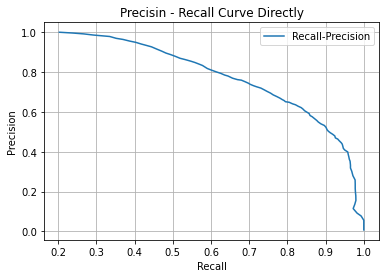

In [1078]:
# let's evaluate the model performance with the precision/recall metrics
#  get the +ve class probability only as the score
cross_RFC_score = cross_RFC_score[:, 1]
prec_rfc, recall_rfc, thre_rfc = precision_recall_curve(y_train, cross_RFC_score)
precision_recall_curve_plot(prec_rfc, recall_rfc, thre_rfc)
precision_recall_direct_plot(prec_rfc, recall_rfc)

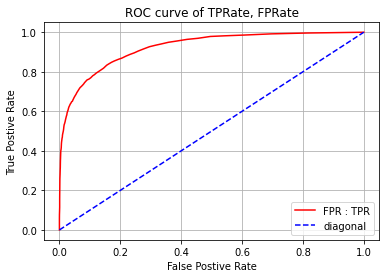

0.9237115061354817

In [1081]:
fpr_rfc, tpr_rfc, thre_rfc_roc = roc_curve(y_train, cross_RFC_score)
roc_curve_plot(fpr_rfc, tpr_rfc)
roc_auc_score(y_train, cross_RFC_score)

We concluded that the **`random forest classifier`** is the most promising model to be used.
With **`AUC` = 92.37%**

Let's `fine-tune` our model

In [1085]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = [
    {'n_estimators': randint(low=1, high=200), 'max_features':randint(low=1, high=17), 'max_depth': randint(low=1, high=50)}
]

model_RFC_randcv = RandomizedSearchCV(model_RFC, param_dist, cv=3, random_state=42, return_train_score=True, verbose=2)

In [1086]:
model_RFC_randcv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=39, max_features=4, n_estimators=93 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=39, max_features=4, n_estimators=93, total=   0.8s
[CV] max_depth=39, max_features=4, n_estimators=93 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .... max_depth=39, max_features=4, n_estimators=93, total=   0.8s
[CV] max_depth=39, max_features=4, n_estimators=93 ...................
[CV] .... max_depth=39, max_features=4, n_estimators=93, total=   0.9s
[CV] max_depth=15, max_features=11, n_estimators=72 ..................
[CV] ... max_depth=15, max_features=11, n_estimators=72, total=   1.2s
[CV] max_depth=15, max_features=11, n_estimators=72 ..................
[CV] ... max_depth=15, max_features=11, n_estimators=72, total=   1.2s
[CV] max_depth=15, max_features=11, n_estimators=72 ..................
[CV] ... max_depth=15, max_features=11, n_estimators=72, total=   1.2s
[CV] max_depth=21, max_features=7, n_estimators=122 ..................
[CV] ... max_depth=21, max_features=7, n_estimators=122, total=   1.4s
[CV] max_depth=21, max_features=7, n_estimators=122 ..................
[CV] ... max_depth=21, max_features=7, n_estimators=122, total=   1.4s
[CV] max_depth=21, max_features=7, n_estimators=122 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.7s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002D17793A1C0>,
                                         'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002D1769C0550>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002D177D17D60>}],
                   random_state=42, return_train_score=True, verbose=2)

In [1088]:
model_RFC_randcv.best_estimator_, model_RFC_randcv.best_score_, model_RFC_randcv.

(RandomForestClassifier(max_depth=11, max_features=8, n_estimators=117),
 0.8954444444444446)

In [1089]:
cross_RFC_pred = cross_val_predict(model_RFC_randcv.best_estimator_, X_train, y_train, cv=10)

In [1090]:
confusion_matrix(y_train, cross_RFC_pred)

array([[6950,  221],
       [ 691, 1138]], dtype=int64)

In [1091]:
cross_RFC_score = cross_val_predict(model_RFC_randcv.best_estimator_, X_train, y_train, cv=10, method='predict_proba')
cross_RFC_score = cross_RFC_score[:, 1] # the proba of the +ve class to be used as a score

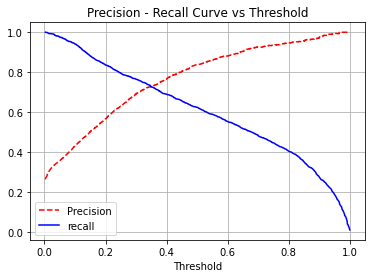

<Figure size 1800x720 with 0 Axes>

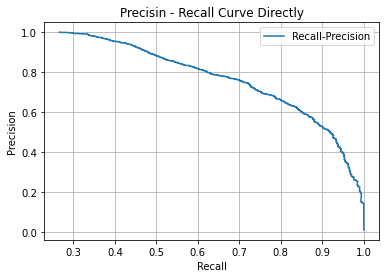

In [1092]:
# let's evaluate the model performance with the precision/recall metrics
#  get the +ve class probability only as the score
prec_rfc, recall_rfc, thre_rfc = precision_recall_curve(y_train, cross_RFC_score)
precision_recall_curve_plot(prec_rfc, recall_rfc, thre_rfc)
precision_recall_direct_plot(prec_rfc, recall_rfc)

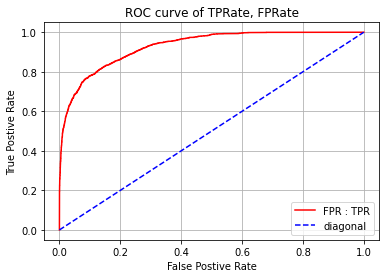

0.9291605617334079

In [1093]:
fpr_rfc, tpr_rfc, thre_rfc_roc = roc_curve(y_train, cross_RFC_score)
roc_curve_plot(fpr_rfc, tpr_rfc)
roc_auc_score(y_train, cross_RFC_score)

In [1094]:
model_RFC_randcv.best_estimator_ # Done!

RandomForestClassifier(max_depth=11, max_features=8, n_estimators=117)

### Let's evaluate the model performance on the testing dataset


In [1096]:
final_test_data = full_pipe.fit_transform(test_df)

array([[0.0, 0, 750.0, 30.0, 3.0, 150000.0, 2.0, 1.0, 1.0,
        0.0967741935483871, 1.2831910927408874, 420.5, 0.478765173440689,
        1.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 0, 500.0, 30.0, 8.0, 0.0, 2.0, 0.0, 0.0,
        0.21052631578947367, 0.0, 284.5, -0.33031818856910633, 0.0, 0.0,
        1.0, 0.0, 1.0],
       [0.0, 0, 500.0, 45.0, 1.0, 50000.0, 1.0, 1.0, 0.0,
        0.021739130434782608, 1.0759295472115098, 536.0,
        -0.6480166714882736, 1.0, 0.0, 0.0, 0.0, 1.0],
       [0.0, 0, 750.0, 30.0, 10.0, 50000.0, 1.0, 1.0, 1.0,
        0.24390243902439024, 1.0226598984199526, 758.0,
        -0.35656893499167513, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 0, 500.0, 30.0, 9.0, 0.0, 1.0, 1.0, 1.0, 0.25, 0.0, 584.0,
        0.11901750942406418, 1.0, 0.0, 0.0, 0.0, 1.0],
       [0.3333333333333333, 0, 500.0, 30.0, 9.0, 0.0, 2.0, 1.0, 0.0,
        0.20454545454545456, 0.0, 283.5, -0.19211408504127298, 0.0, 0.0,
        1.0, 0.0, 1.0],
       [0.0, 0, 500.0, 30.0, 9.0, 100000.0, 2.0,

In [1097]:
final_test_data.shape

(1000, 18)

In [1098]:
final_test_data[-10:]

array([[1.0, 1, 625.0, 30.0, 6.0, 100000.0, 1.0, 1.0, 1.0,
        0.15384615384615385, 0.6888192166385911, 729.0,
        1.4766207671449485, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 0, 625.0, 30.0, 2.0, 100000.0, 1.0, 0.0, 0.0,
        0.05405405405405406, 1.8646626782697509, 660.0,
        -0.4706926753140515, 0.0, 1.0, 0.0, 1.0, 0.0],
       [0.6666666666666666, 1, 375.0, 45.0, 5.0, 0.0, 1.0, 1.0, 0.0,
        0.10416666666666667, 0.0, 469.0, 1.057336515888406, 1.0, 0.0,
        0.0, 1.0, 0.0],
       [0.0, 0, 500.0, 45.0, 9.0, 50000.0, 1.0, 1.0, 1.0,
        0.19148936170212766, 0.6052978930072532, 533.0,
        0.6657335259824401, 1.0, 0.0, 0.0, 0.0, 1.0],
       [0.5, 1, 500.0, 30.0, 2.0, 150000.0, 1.0, 1.0, 0.0, 0.0625,
        0.9168721469162384, 548.0, 1.5298996876568713, 1.0, 0.0, 0.0,
        1.0, 0.0],
       [0.0, 0, 625.0, 60.0, 4.0, 100000.0, 1.0, 0.0, 0.0,
        0.058823529411764705, 0.7783732006895814, 721.0,
        1.3123531995709263, 0.0, 1.0, 0.0, 0.0, 1.0],
    

In [1099]:
# let's drop the target labels
X_test = np.c_[final_test_data[:, 0], final_test_data[:, 2:]]
y_test = test_df.Exited.copy()

In [1102]:
rfc_final_pred = model_RFC_randcv.best_estimator_.predict(X_test)
confusion_matrix(y_test, rfc_final_pred)

array([[779,  13],
       [ 29, 179]], dtype=int64)

In [1105]:
precision_score(y_test, rfc_final_pred), recall_score(y_test, rfc_final_pred), f1_score(y_test, rfc_final_pred)

(0.9322916666666666, 0.8605769230769231, 0.8949999999999999)

In [1106]:
rfc_final_score = model_RFC_randcv.best_estimator_.predict_proba(X_test)

In [1108]:
rfc_final_score = rfc_final_score[:, 1] # we take the +ve class probability as the score

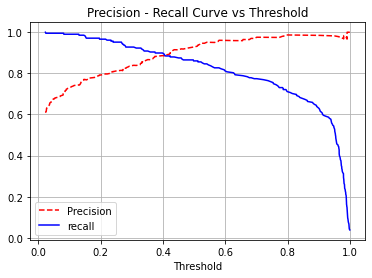

<Figure size 1800x720 with 0 Axes>

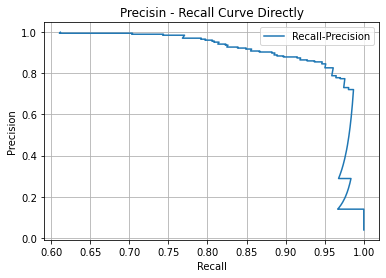

In [1110]:
prec_rfc, recall_rfc, thre_rfc = precision_recall_curve(y_test, rfc_final_score)
precision_recall_curve_plot(prec_rfc, recall_rfc, thre_rfc)
precision_recall_direct_plot(prec_rfc, recall_rfc)

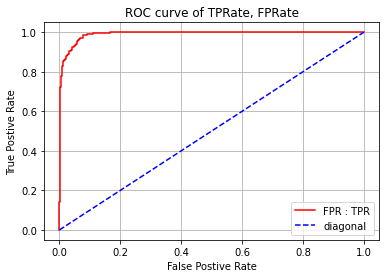

0.9901418026418027

In [1111]:
fpr_rfc, tpr_rfc, thre_rfc_roc = roc_curve(y_test, rfc_final_score)
roc_curve_plot(fpr_rfc, tpr_rfc)
roc_auc_score(y_test, rfc_final_score)

In [1103]:
accuracy_score(y_test, rfc_final_pred)*100

95.8

### This is the end of our classification Journey  ;)

Final results on the testing dataset after fine-tuning: <br>
1. `Precision: 93.23%`<br>
2. `Recall:    86.06%`<br>
3. `accuracy:  95.8%`<br>

### Saving our final model

In [1124]:
import joblib
joblib.dump(model_RFC_randcv.best_estimator_, 'final_RFC_fine_tuned.pkl')

['final_RFC_fine_tuned.pkl']

### Saving our final transformed testing dataset

In [1125]:
test_df_transformed = pd.DataFrame(final_test_data, columns=list_transformed_attrs)
test_df_transformed.head()

,SurnamePercent,Exited,CreditCardBucket,AgeBucket,Tenure,BalanceBucket,NumOfProducts,HasCrCard,IsActiveMember,TenurePerAge,BalancePerSalary,CreditPerProduct,EstSalaryScaled,Geo.France,Geo.Germany,Geo.Spain,Gen.Female,Gen.Male
0,0,0,750,30,3,150000,2,1,1,0.0967742,1.28319,420.5,0.478765,1,0,0,1,0
1,0,0,500,30,8,0,2,0,0,0.210526,0,284.5,-0.330318,0,0,1,0,1
2,0,0,500,45,1,50000,1,1,0,0.0217391,1.07593,536,-0.648017,1,0,0,0,1
3,0,0,750,30,10,50000,1,1,1,0.243902,1.02266,758,-0.356569,0,1,0,0,1
4,0,0,500,30,9,0,1,1,1,0.25,0,584,0.119018,1,0,0,0,1


In [1126]:
test_df_transformed.to_csv('datasets/churnd/test_df_transformed.csv', index=False)